In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import NearestCentroid
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Ridge

In [2]:
training = pd.read_csv('./Output/clean_training_LE.csv', index_col=0)

In [3]:
prediction = pd.read_csv('./Output/clean_prediction_LE.csv', index_col=0)

# Aquí pongo algunos modelos para testear los RMSE 

In [4]:
models = {
    #"Tree" : DecisionTreeClassifier(), RMSE = 1909.61
    #"RandomForestClass" : RandomForestClassifier(), Kernel died
    "RandomForestRegressor" : RandomForestRegressor(), #poca diferencia con n_estimators = 500
    #"Centroid": NearestCentroid(), RMSE= 1966
    #"SVC": SVC(), Kernel died
    #"KNeighborsClass" : KNeighborsClassifier(),
    "GradientBoostRegressor" : GradientBoostingRegressor(n_estimators=100), #probar más n_estimators
    "GradientBoostRegressor500" : GradientBoostingRegressor(n_estimators=500),
    #"LinearRegression": LinearRegression(), #RMSE 1324.9985848560812
    #'DecisionTree': DecisionTreeRegressor(), # RMSE 745.1660130909593
    #"Ridge" : Ridge(), #RMSE 1325.2177613546255
    "RandomForestRegressor500" : RandomForestRegressor(n_estimators=500), # mejor RMSE
    #"RandomForestRegressor800" : RandomForestRegressor(n_estimators=800), # peor RMSE que con 500
    #"GradientBoostRegressor800" : GradientBoostingRegressor(n_estimators=800)  # peor RMSE que con 500  
}

In [5]:
columnas = [i for i in training.columns if i not in ["price"]]
X = training[columnas]
y = training["price"]

In [6]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.2)

In [7]:
dicc = {}
for name, model in models.items():
    print(f"Training {name}")
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('RMSE', math.sqrt(mean_squared_error(y_test, y_pred)))
    dicc[name]= y_pred
print("He acabado :D")
# Muchos problemas respecto a los RMSE (me salían cercanos a 500-700) por utilizar mal el Label Encoder

Training RandomForestRegressor
RMSE 570.7623968127723
Training GradientBoostRegressor
RMSE 665.7265426328133
Training GradientBoostRegressor500
RMSE 562.8749742498222
Training RandomForestRegressor500
RMSE 574.0637158741982
He acabado :D


In [8]:
dicc

{'RandomForestRegressor': array([  806.8 , 17379.44,  4222.38, ...,   990.64,  1102.69,   743.49]),
 'GradientBoostRegressor': array([  644.02648192, 18037.11057698,  4799.57168864, ...,
          998.93876535,  1147.88925635,   663.26215128]),
 'GradientBoostRegressor500': array([  538.16298588, 19158.84432715,  4522.07563622, ...,
          997.73314179,  1182.87390391,   653.25274117]),
 'RandomForestRegressor500': array([  804.898 , 17530.2835,  4313.738 , ...,   995.29  ,  1082.356 ,
          745.566 ])}

In [9]:
models_try = pd.DataFrame(dicc)

In [10]:
# Observamos cuales de los modelos que voy intentando se acerca más al GT respecto del X_Test
models_try['GT']= y_test.values
models_try

,RandomForestRegressor,GradientBoostRegressor,GradientBoostRegressor500,RandomForestRegressor500,GT
0,806.800000,644.026482,538.162986,804.898000,818
1,17379.440000,18037.110577,19158.844327,17530.283500,18700
2,4222.380000,4799.571689,4522.075636,4313.738000,4434
3,740.910000,651.693373,631.731218,734.494000,748
4,2540.860000,2521.372269,2472.164948,2547.618000,2382
...,...,...,...,...,...
8086,819.620000,898.978781,947.383855,828.200000,862
8087,1247.298333,1301.516649,1348.394029,1252.749667,1279
8088,990.640000,998.938765,997.733142,995.290000,1040
8089,1102.690000,1147.889256,1182.873904,1082.356000,885


# Predicts

In [11]:
predictions = dict()
for name, model in models.items():
    y_predict = model.predict(prediction)
    predictions[name] = y_predict

In [12]:
predictions

{'RandomForestRegressor': array([14573.31, 15398.64,  1040.59, ...,  2389.6 ,  1048.16,  2795.44]),
 'GradientBoostRegressor': array([15391.5237155 , 15000.22047185,  1339.49106177, ...,
         2775.17767801,  1182.21121553,  2183.88657011]),
 'GradientBoostRegressor500': array([15326.79066391, 15605.26287187,  1358.51965973, ...,
         2401.51498574,  1158.00746194,  2241.15953735]),
 'RandomForestRegressor500': array([14699.17  , 15453.4   ,  1032.498 , ...,  2392.8915,  1049.476 ,
         2753.478 ])}

# Pasamos a DataFrames los que más se asemejan al GT del que disponemos

In [13]:
predict_GRAD = pd.DataFrame(predictions['GradientBoostRegressor']).reset_index()
predict_GRAD = predict_GRAD.rename(columns={"index": "id", 0: "price"})
predict_GRAD

,id,price
0,0,15391.523716
1,1,15000.220472
2,2,1339.491062
3,3,478.266081
4,4,3445.125842
...,...,...
13480,13480,2232.937220
13481,13481,5188.922419
13482,13482,2775.177678
13483,13483,1182.211216


In [14]:
predict_RFReg = pd.DataFrame(predictions['RandomForestRegressor']).reset_index()
predict_RFReg = predict_RFReg.rename(columns={"index": "id", 0: "price"})
predict_RFReg

,id,price
0,0,14573.31
1,1,15398.64
2,2,1040.59
3,3,455.59
4,4,3570.20
...,...,...
13480,13480,2536.88
13481,13481,4922.93
13482,13482,2389.60
13483,13483,1048.16


In [15]:
predict_RFReg500 = pd.DataFrame(predictions['RandomForestRegressor500']).reset_index()
predict_RFReg500 = predict_RFReg500.rename(columns={"index": "id", 0: "price"})
predict_RFReg500

,id,price
0,0,14699.1700
1,1,15453.4000
2,2,1032.4980
3,3,444.8860
4,4,3645.5120
...,...,...
13480,13480,2557.0000
13481,13481,5012.1780
13482,13482,2392.8915
13483,13483,1049.4760


In [16]:
predict_GRAD500 = pd.DataFrame(predictions['GradientBoostRegressor500']).reset_index()
predict_GRAD500 = predict_GRAD500.rename(columns={"index": "id", 0: "price"})
predict_GRAD500

,id,price
0,0,15326.790664
1,1,15605.262872
2,2,1358.519660
3,3,535.993147
4,4,2989.692148
...,...,...
13480,13480,2482.449695
13481,13481,5120.590226
13482,13482,2401.514986
13483,13483,1158.007462


# Pasando a CSV para poder hacer Submit

In [17]:
predict_GRAD.to_csv('./Output/predictionGradientBRegr', index=False)

In [18]:
predict_RFReg.to_csv('./Output/predictionRandomForRegr', index=False)

In [19]:
predict_RFReg500.to_csv('./Output/predictionRandomForRegr500', index=False)

In [20]:
predict_GRAD500.to_csv('./Output/predictionGradientBRegr', index=False)

### PLT

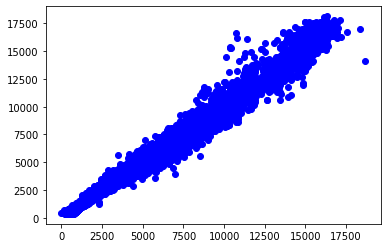

In [21]:
plt.scatter(predict_GRAD['price'],predict_RFReg['price'], c='blue')

plt.show()
# Los predicts de ambas (dos primeros csv con score más bajo)

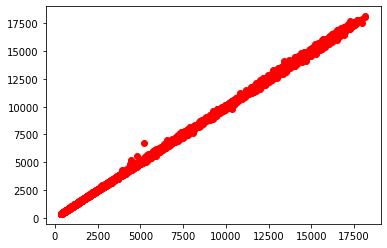

In [22]:
plt.scatter(predict_RFReg500['price'],predict_RFReg['price'], c='red')
#se puede observar la diferencia con el modelo de GradientBoostRegressor